In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


In [2]:
df = pd.read_csv(r'C:\Users\kiyo3001\Desktop\Personal\Python\Store_Data\cleaned_retaill_sales.csv')
df.head()

,Unnamed: 0,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
0,0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,4/8/2024,True
1,1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,7/23/2023,True
2,2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,10/5/2022,False
3,3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,5/7/2022,True
4,4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,10/2/2022,False


In [3]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [4]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month


In [5]:
df.head()

,Unnamed: 0,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,year,month
0,0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True,2024,4
1,1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True,2023,7
2,2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False,2022,10
3,3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,True,2022,5
4,4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False,2022,10


In [6]:
df.describe()

,Unnamed: 0,price_per_unit,quantity,total_spent,transaction_date,year,month
count,12575.000000,12575.000000,12575.000000,12575.000000,12575,12575.000000,12575.000000
mean,6287.000000,23.348191,5.558648,130.114950,2023-07-12 20:23:41.105368064,2023.042386,6.366441
min,0.000000,5.000000,1.000000,5.000000,2022-01-01 00:00:00,2022.000000,1.000000
25%,3143.500000,14.000000,3.000000,55.000000,2022-09-30 00:00:00,2022.000000,3.000000
50%,6287.000000,23.000000,6.000000,111.000000,2023-07-13 00:00:00,2023.000000,6.000000
75%,9430.500000,32.000000,8.000000,192.000000,2024-04-24 00:00:00,2024.000000,9.000000
max,12574.000000,41.000000,10.000000,410.000000,2025-01-18 00:00:00,2025.000000,12.000000
std,3630.234152,10.480413,2.790160,92.327187,NaN,0.855581,3.503156


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        12575 non-null  int64         
 1   transaction_id    12575 non-null  object        
 2   customer_id       12575 non-null  object        
 3   category          12575 non-null  object        
 4   item              12575 non-null  object        
 5   price_per_unit    12575 non-null  float64       
 6   quantity          12575 non-null  int64         
 7   total_spent       12575 non-null  float64       
 8   payment_method    12575 non-null  object        
 9   location          12575 non-null  object        
 10  transaction_date  12575 non-null  datetime64[ns]
 11  discount_applied  12575 non-null  bool          
 12  year              12575 non-null  int32         
 13  month             12575 non-null  int32         
dtypes: bool(1), datetime64

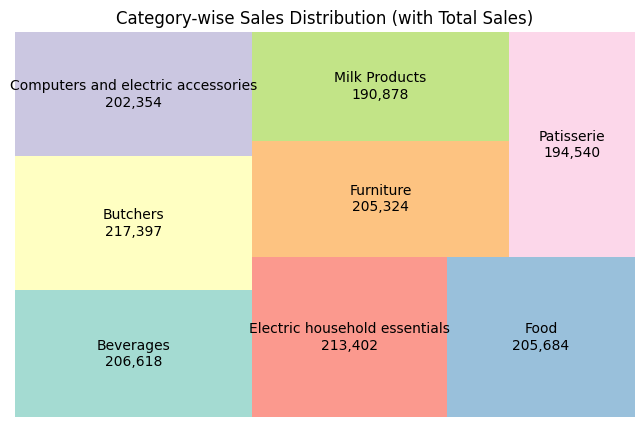

In [8]:
# 1) Category wise Sales Distribution

# Prepare data
category_sales = df.groupby('category')['total_spent'].sum().reset_index()

# Create labels with category and total sales
labels = [f"{cat}\n{val:,.0f}" for cat, val in zip(category_sales['category'], category_sales['total_spent'])]

# Plot treemap
plt.figure(figsize=(8,5))
squarify.plot(sizes=category_sales['total_spent'], label=labels, alpha=.8, color=plt.cm.Set3.colors)
plt.title('Category-wise Sales Distribution (with Total Sales)')
plt.axis('off')
plt.show()



In [9]:
# 2) Top 10 Items by Total sales
top_items = df.groupby(['category','item'])['total_spent'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_items)


                             category          item  total_spent
0                           Furniture   Item_25_FUR      25256.0
1       Electric household essentials   Item_25_EHE      23083.0
2                          Patisserie  Unknown Item      22210.0
3                            Butchers   Item_25_BUT      21894.0
4  Computers and electric accessories  Unknown Item      21451.0
5                           Furniture   Item_24_FUR      21172.0
6                                Food  Unknown Item      21039.0
7       Electric household essentials  Unknown Item      20960.0
8                                Food  Item_25_FOOD      20541.0
9                       Milk Products  Unknown Item      20130.0


C:\Users\kiyo3001\AppData\Local\Temp\1\ipykernel_20304\114490537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x= 'customer_id', y='total_spent', palette='Set3')


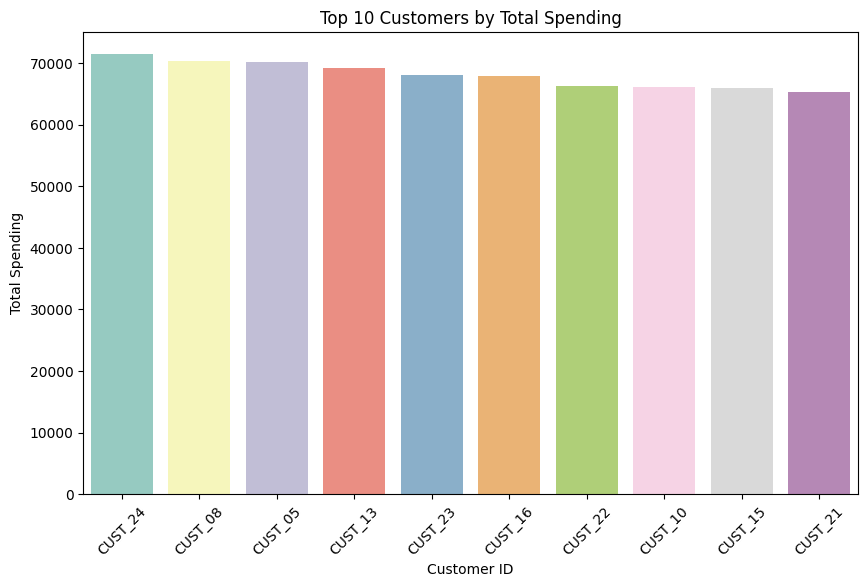

In [10]:
# 3)  Top 10 customer by Total spending

# Prepare data
top_customers = df.groupby('customer_id')['total_spent'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x= 'customer_id', y='total_spent', palette='Set3')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [11]:
# 4) Top 10 Items with highest Average price per unit
avg_price_items = df.groupby(['category','item'])['price_per_unit'].mean().sort_values(ascending=False).head(10)
print(avg_price_items)

category                            item        
Butchers                            Item_25_BUT     41.0
Computers and electric accessories  Item_25_CEA     41.0
Beverages                           Item_25_BEV     41.0
Patisserie                          Item_25_PAT     41.0
Furniture                           Item_25_FUR     41.0
Milk Products                       Item_25_MILK    41.0
Food                                Item_25_FOOD    41.0
Electric household essentials       Item_25_EHE     41.0
                                    Item_24_EHE     39.5
Food                                Item_24_FOOD    39.5
Name: price_per_unit, dtype: float64


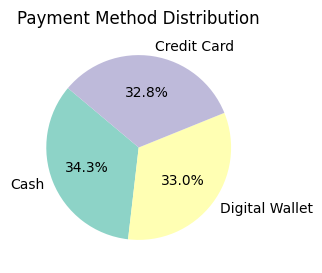

In [12]:
# 5) Payment Method Distribution

# Prepare data
payment_distribution = df['payment_method'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6,3))
plt.pie(payment_distribution, labels= payment_distribution.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Payment Method Distribution')
plt.show()

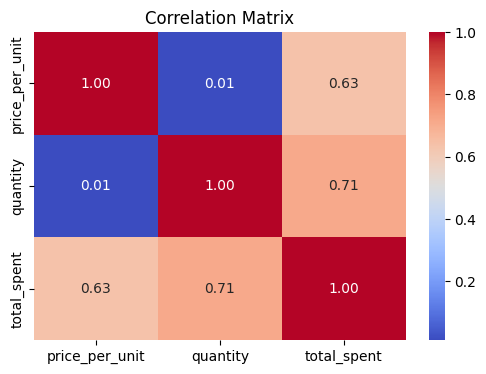

In [13]:
# 6) Correlation Analysis

# Prepare correlation matrix
correlation = df[['price_per_unit', 'quantity', 'total_spent']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

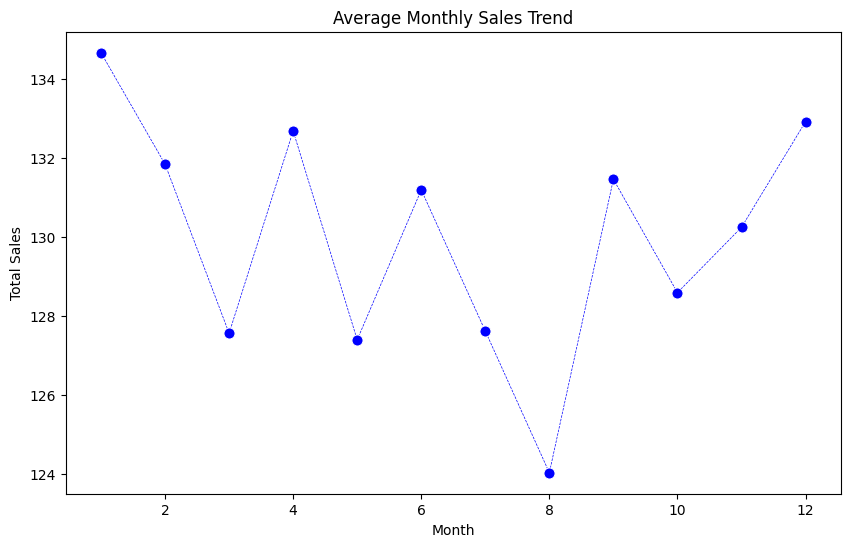

In [14]:
# 7) Average Monthly Sales Trend

# Prepare data
monthly_sales = df.groupby('month')['total_spent'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='month', y='total_spent', marker='o', color='b', linewidth=0.5, markersize=8, linestyle='--')
plt.title('Average Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



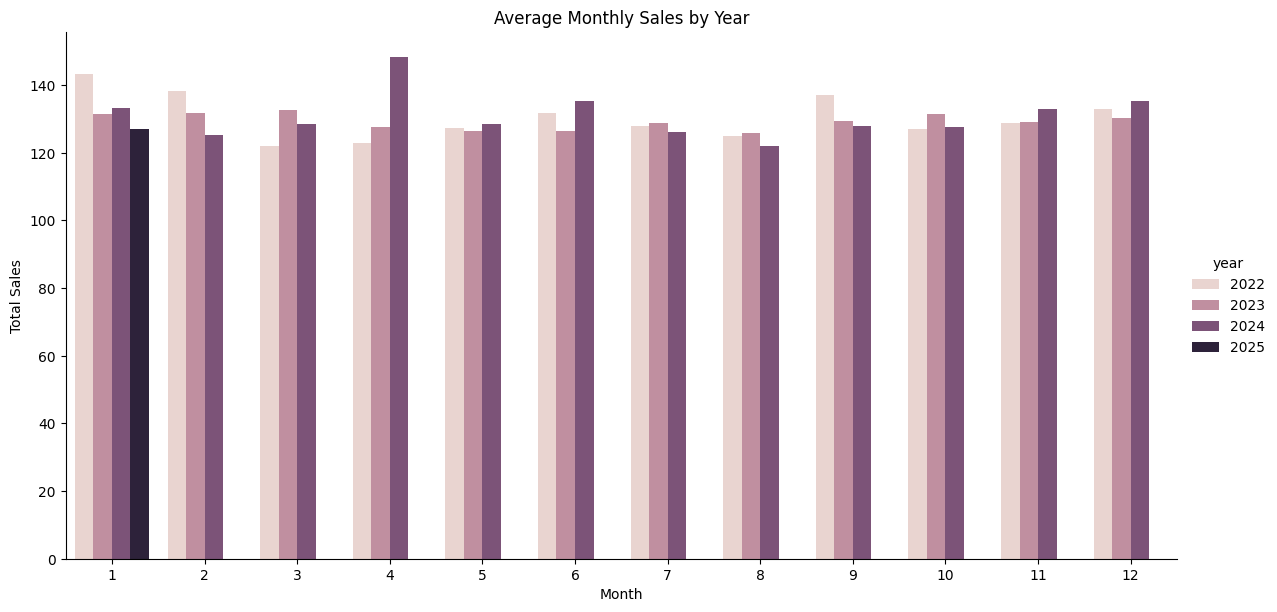

In [15]:
# 8) Average Monthly Sales by Year

# Prepare data
monthly_trend = df.groupby(['year', 'month'])['total_spent'].mean().reset_index()

# Plot bar chart
sns.catplot(data=monthly_trend, x='month', y='total_spent', hue='year', kind='bar', height=6, aspect=2)
plt.title('Average Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



In [16]:
# 9) Discount Impact Analysis
discount_impact = df.groupby(['discount_applied', 'category'])['total_spent'].mean().reset_index()
print(discount_impact)



    discount_applied                            category  total_spent
0              False                           Beverages   132.556566
1              False                            Butchers   145.449416
2              False  Computers and electric accessories   136.941392
3              False       Electric household essentials   127.281250
4              False                                Food   128.549360
5              False                           Furniture   133.305556
6              False                       Milk Products   120.422587
7              False                          Patisserie   121.948171
8               True                           Beverages   131.531716
9               True                            Butchers   135.328273
10              True  Computers and electric accessories   126.070652
11              True       Electric household essentials   137.532455
12              True                                Food   130.036023
13              True